https://en.wikipedia.org/wiki/Hopf_fibration

In [2]:
%matplotlib notebook

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

interactive(children=(FloatSlider(value=3.141592653589793, description='ξ1', max=6.283185307179586, step=0.001…

<IPython.core.display.Javascript object>


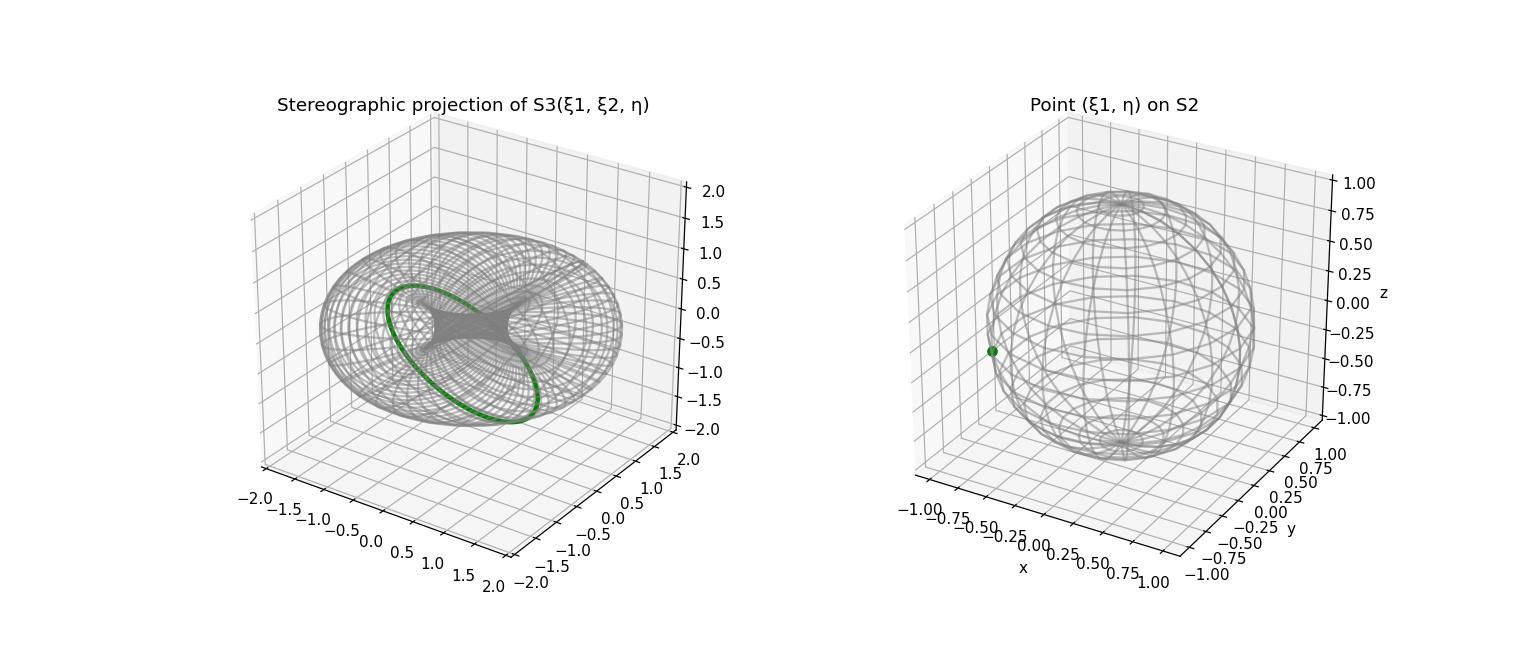

In [51]:
S3torus = None
@interact(ξ1=(0, 2 * np.pi, 1e-3), η = (0, np.pi / 2, 1e-3))
def update(ξ1=np.pi, η=np.pi/4):
    global S3torus
    if 'pointS2' in globals():
        pointS2.set_xdata([np.cos(ξ1)*np.sin(2*η)])
        pointS2.set_ydata([np.sin(ξ1)*np.sin(2*η)])
        pointS2.set_3d_properties([np.cos(2*η)])
        fig.canvas.draw_idle()

        # https://en.wikipedia.org/wiki/Hopf_fibration#Direct_construction
        x1 = np.cos((ξ1 + ξ2) / 2) * np.sin(η)
        x2 = np.sin((ξ1 + ξ2) / 2) * np.sin(η)
        x3 = np.cos((ξ2 - ξ1) / 2) * np.cos(η)
        x4 = np.sin((ξ2 - ξ1) / 2) * np.cos(η)

        X1 = np.cos((Ξ1 + Ξ2) / 2) * np.sin(η)
        X2 = np.sin((Ξ1 + Ξ2) / 2) * np.sin(η)
        X3 = np.cos((Ξ2 - Ξ1) / 2) * np.cos(η)
        X4 = np.sin((Ξ2 - Ξ1) / 2) * np.cos(η)

        # https://en.wikipedia.org/wiki/Stereographic_projection#Generalizations
        S3circle.set_xdata(x1 / (1 - x4))
        S3circle.set_ydata(x2 / (1 - x4))
        S3circle.set_3d_properties(x3 / (1 - x4))
        
        if S3torus: S3torus.remove()
        S3torus = axp.plot_wireframe(X1 / (1 - X4), X2 / (1 - X4), X3 / (1 - X4), color="gray", alpha=0.5)
        
        fig.canvas.draw_idle()

fig, (axp, axs) = plt.subplots(1, 2, figsize=(14,6), subplot_kw={'projection': '3d'})

# draw an S2 sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
axs.plot_wireframe(x, y, z, color="gray", alpha=0.5)
axs.set_xlabel('x')
axs.set_ylabel('y')
axs.set_zlabel('z')

# draw a point on S2 sphere
pointS2, = axs.plot3D([0], [0], [0], 'go')
axs.set_title('Point (ξ1, η) on S2')

# draw a stereographic projection of an S3 sphere
ξ2 = np.arange(0, 4 * np.pi, 0.01)
Ξ1, Ξ2 = np.mgrid[0:2*np.pi:100j, 0:4*np.pi:200j]
S3circle, = axp.plot3D([0], [0], [0], 'g-', linewidth=3)
axp.set_xlim3d(-2, 2)
axp.set_ylim3d(-2, 2)
axp.set_zlim3d(-2, 2)
axp.set_title('Stereographic projection of S3(ξ1, ξ2, η)')

update()